# Part 1

In [35]:
import numpy as np
import pandas as pd

In [36]:
test_moves = pd.read_csv('test_input.txt', sep=' ', names=['direction', 'distance'])

In [37]:
test_moves

,direction,distance
0,R,4
1,U,4
2,L,3
3,D,1
4,R,4
5,D,1
6,L,5
7,R,2


In [58]:
def move_head(x_head, y_head, moves, grid):
    x_tail, y_tail = (x_head, y_head)
    # Loop over the moves and update the grid
    # R = right, L = left, U = up, D = down
    # There is a head and a tail. The moves in the input are for the head
    # The tail follows the head always one step behind
    for i, move in moves.iterrows():
        # Read the number of steps from the distance column
        # And step through one by one
        for j in range(move.distance):
            # Check the direction and move the head
            if move.direction == 'R':
                x_head += 1
            elif move.direction == 'L':
                x_head -= 1
            elif move.direction == 'U':
                y_head -= 1
            elif move.direction == 'D':
                y_head += 1
            
            # Now move the tail one step behind the head
            # Calculate euclidean distance between head and tail
            # If the distance is larger than 1, move the tail one step closer to the head
            # If the distance is 1, do nothing
            # If the distance is larger than 1 diagonally, move the tail one step closer to the head diagonally
            # If the distance is 1 diagonally, do nothing
            dist_x = x_head - x_tail
            dist_y = y_head - y_tail
            dist = (dist_x, dist_y)

            # Now check up, down, left, right
            if abs(dist_x) == 2:
                x_tail += np.sign(dist_x)
                if abs(dist_y) == 1:
                    y_tail += dist_y
            if abs(dist_y) == 2:
                y_tail += np.sign(dist_y)
                if abs(dist_x) == 1:
                    x_tail += dist_x

            # Update the grid to mark that the tail has been there
            grid[y_tail, x_tail] = 1
    return grid

In [59]:
def plot_grid(grid):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    plt.imshow(grid)
    plt.show()

In [60]:
# Initialize the grid and the starting position in the center
initial_test_grid = np.zeros((5, 6))
x_head, y_head = 0, 4

test_grid = move_head(x_head, y_head, test_moves, initial_test_grid)

In [61]:
test_grid

array([[0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 1., 1., 1., 0., 0.]])

In [62]:
int(np.sum(test_grid))

13

With the actual data

In [65]:
# Start a bigger grid
intial_grid = np.zeros((400, 400))
x_head, y_head = 200, 200

# Load the input
moves = pd.read_csv('input.txt', sep=' ', names=['direction', 'distance'])

final_grid = move_head(x_head, y_head, moves, intial_grid)

In [66]:
int(np.sum(final_grid))

6037

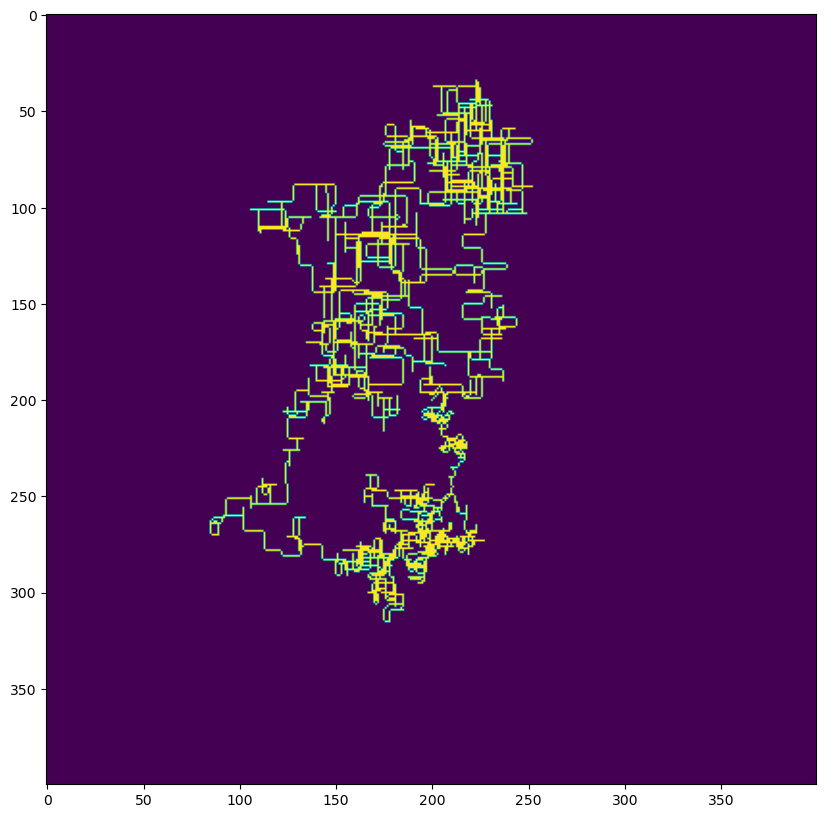

In [67]:
plot_grid(final_grid)

# Part 2

In [70]:
def move_long_rope(moves, grid_size):
    # Initialize the grid
    grid = np.zeros((grid_size, grid_size))
    
    # Initialize the grid and the starting position in the center
    x_head, y_head = int(grid_size/2), int(grid_size/2)

    # movie of intermediate positions
    # Save the grid after each move
    head_positions = np.zeros((grid_size, grid_size, len(moves)))
    rope_status = np.zeros((grid_size, grid_size, moves.distance.sum()))
    movie = np.zeros((grid_size, grid_size, len(moves)))

    # Initialize the tail positions
    tail_positions = np.zeros([9,2])
    tail_positions[:,0] = y_head
    tail_positions[:,1] = x_head
    # Loop over the moves and update the grid
    # R = right, L = left, U = up, D = down
    # There is a head and a tail. The moves in the input are for the head
    # The tail follows the head always one step behind
    l = 0
    for i, move in moves.iterrows():
        # Read the number of steps from the distance column
        # And step through one by one
        for j in range(move.distance):
            # Check the direction and move the head
            if move.direction == 'R':
                x_head += 1
            elif move.direction == 'L':
                x_head -= 1
            elif move.direction == 'U':
                y_head -= 1
            elif move.direction == 'D':
                y_head += 1
            
            # Now move the tail one step behind the head
            # Calculate euclidean distance between head and tail
            # If the distance is larger than 1, move the tail one step closer to the head
            # If the distance is 1, do nothing
            # If the distance is larger than 1 diagonally, move the tail one step closer to the head diagonally
            # If the distance is 1 diagonally, do nothing

            current_knot = np.array([y_head, x_head])
            # Move all the previous knots
            for k in range(len(tail_positions)):
                dist_x = int(current_knot[1] - tail_positions[k,1])
                dist_y = int(current_knot[0] - tail_positions[k,0])
                dist = (dist_x, dist_y)

                # Now check up, down, left, right
                if abs(dist_x) == 2:
                    tail_positions[k,1] += np.sign(dist_x)
                    if abs(dist_y) == 1:
                        tail_positions[k,0] += dist_y
                if abs(dist_y) == 2:
                    tail_positions[k,0] += np.sign(dist_y)
                    if abs(dist_x) == 1:
                        tail_positions[k,1] += dist_x

                current_knot = tail_positions[k]
                
            # Update the grid to mark that the tail (the last knot) has been there
            grid[int(tail_positions[k,0]), int(tail_positions[k,1])] = 1

            # Save the grid after each move
            movie[:,:,i] = grid

            # Update rope_status by setting to 1 all the positions where the rope has been head and tail
            rope_status[y_head, x_head, l] = 1
            for k in range(len(tail_positions)):
                rope_status[int(tail_positions[k,0]), int(tail_positions[k,1]), l] = 1

            rope_status[:, :, l][grid.astype(bool)] = -1
            l += 1

    return grid, movie, rope_status

In [71]:
def play_movie(movie, framerate, filename):
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    fig = plt.figure(figsize=(10,10))
    ims = []
    for i in range(movie.shape[2]):
        im = plt.imshow(movie[:,:,i], animated=True)
        ims.append([im])
    # Use framerate to set the interval between frames
    anim = animation.ArtistAnimation(fig, ims, interval=1000/framerate, blit=True)
    
    anim.save(filename)

In [72]:
test2_moves = pd.read_csv('test2_input.txt', sep=' ', names=['direction', 'distance'])

test2_rope, movie_test2, rope_status_test2 = move_long_rope(test2_moves, 30)

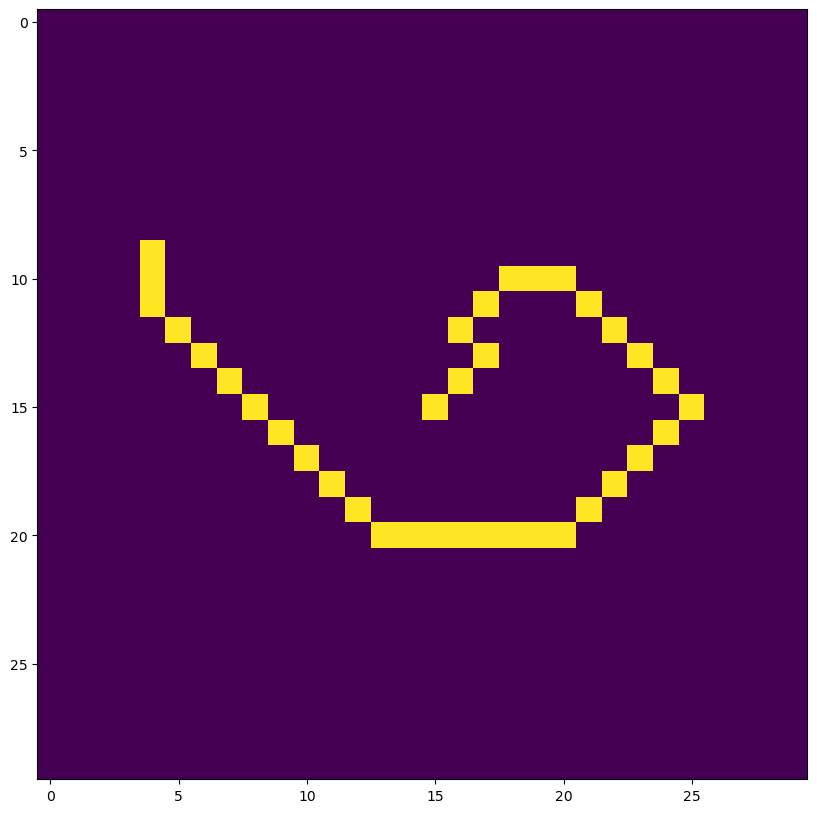

In [73]:
plot_grid(test2_rope)

In [74]:
# play_movie(rope_status_test2, 20, 'test2.mp4')

In [75]:
int(np.sum(test2_rope))

36

### Witht the actual input data

In [76]:
final_rope_2, movie_2, rope_status_2 = move_long_rope(moves, 400)


current move =  122
current knot =  0
current overall move =  182
current head position =  [210 201]
current tail position =  [209. 202.]
dist_x =  -1
dist_y =  1
dist =  (-1, 1)
new tail position =  [209. 202.]

current move =  122
current knot =  1
current overall move =  182
current head position =  [210 201]
current tail position =  [208. 203.]
dist_x =  -1
dist_y =  1
dist =  (-1, 1)
new tail position =  [208. 203.]

current move =  122
current knot =  2
current overall move =  182
current head position =  [210 201]
current tail position =  [209. 203.]
dist_x =  0
dist_y =  -1
dist =  (0, -1)
new tail position =  [209. 203.]

current move =  122
current knot =  3
current overall move =  182
current head position =  [210 201]
current tail position =  [210. 204.]
dist_x =  -1
dist_y =  -1
dist =  (-1, -1)
new tail position =  [210. 204.]

current move =  122
current knot =  4
current overall move =  182
current head position =  [210 201]
current tail position =  [209. 204.]
dist_x 

In [77]:
rope_status_2.shape

(400, 400, 11386)

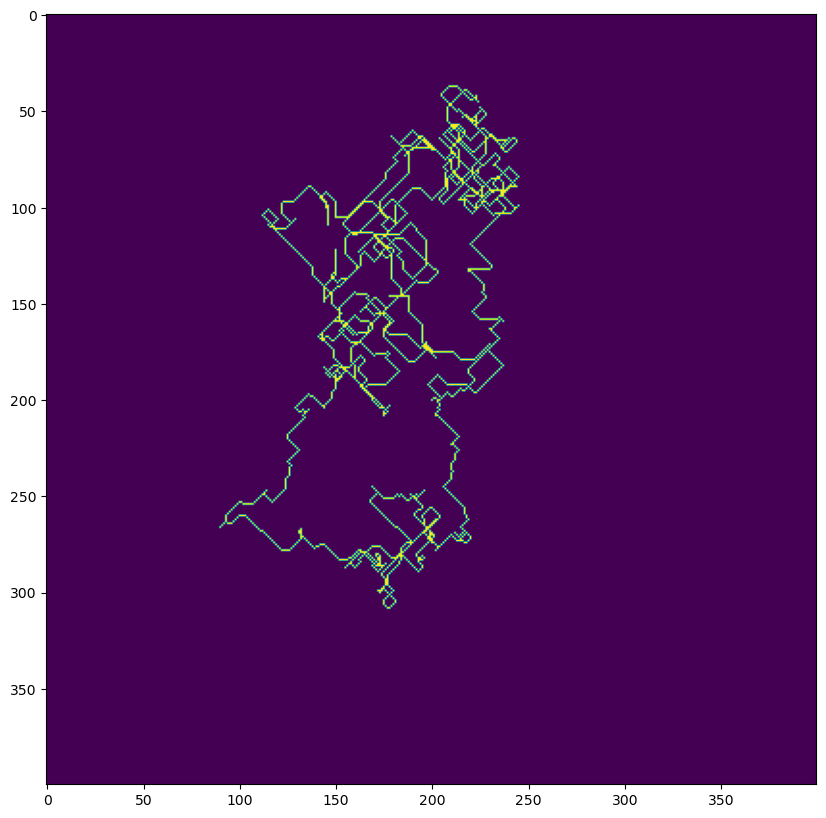

In [78]:
plot_grid(final_rope_2)

Solution to problem question:

In [81]:
int(np.sum(final_rope_2))

2485